In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import cv2 
import re
import numpy as np

In [47]:
img = cv2.imread("./Selecao.jpeg")
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

In [48]:
pixel_vals = img.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

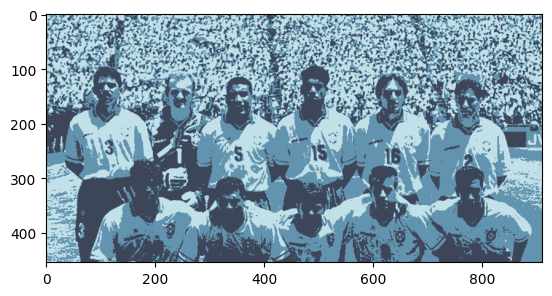

In [49]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.90)
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria ,10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((img.shape))
plt.imshow(segmented_image)

In [50]:
df = pd.read_csv("KMeans_Salario.csv",delimiter=';')
df = df.drop(columns=["Nome"])

def salario_para_numero(salario_texto):
    return float(re.sub(r'[^\d.]', '', salario_texto))

df['Salário Mensal'] = df['Salário Mensal'].apply(salario_para_numero)

df.head(10)

,Idade,Salário Mensal
0,82,44.856
1,53,45.056
2,37,64.674
3,68,27.950
4,39,23.441
5,31,46.985
6,81,20.666
7,52,7.349
8,44,78.542
9,61,14.656


In [54]:
valores_k = []
inercia = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,n_init='auto').fit(df)
    valores_k.append(i)
    inercia.append(kmeans.inertia_)
    print(kmeans.inertia_)

17709.189981555555
8199.200337999999
5561.15046580303
3256.132900345238
2418.7417203333334
1994.1851491999998
1438.9210131666666
921.0684810833332
916.4917084999998
568.2355675000002
460.1242618333333
282.8898889999999
227.8273269999999
143.78230199999996


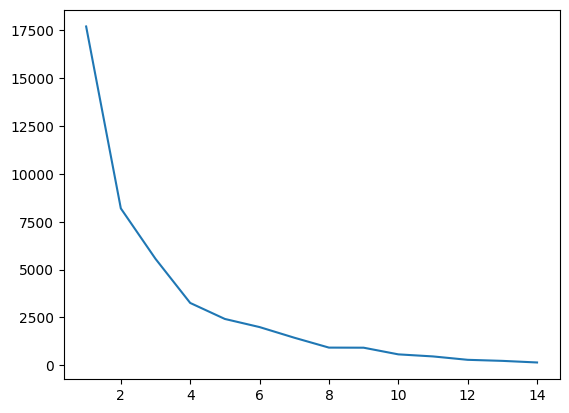

In [55]:
fig, ax = plt.subplots()
ax.plot(valores_k, inercia)

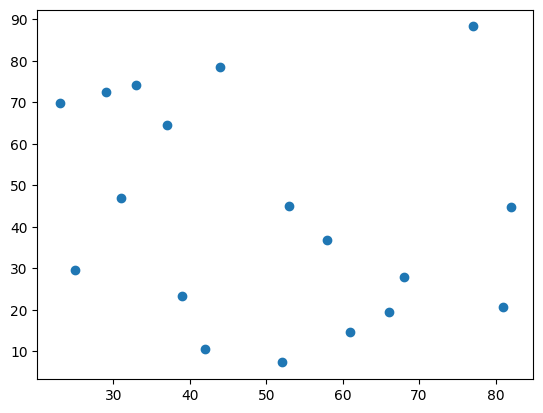

In [51]:
fig, ax = plt.subplots()
ax.scatter(df["Idade"],df["Salário Mensal"])
plt.show()

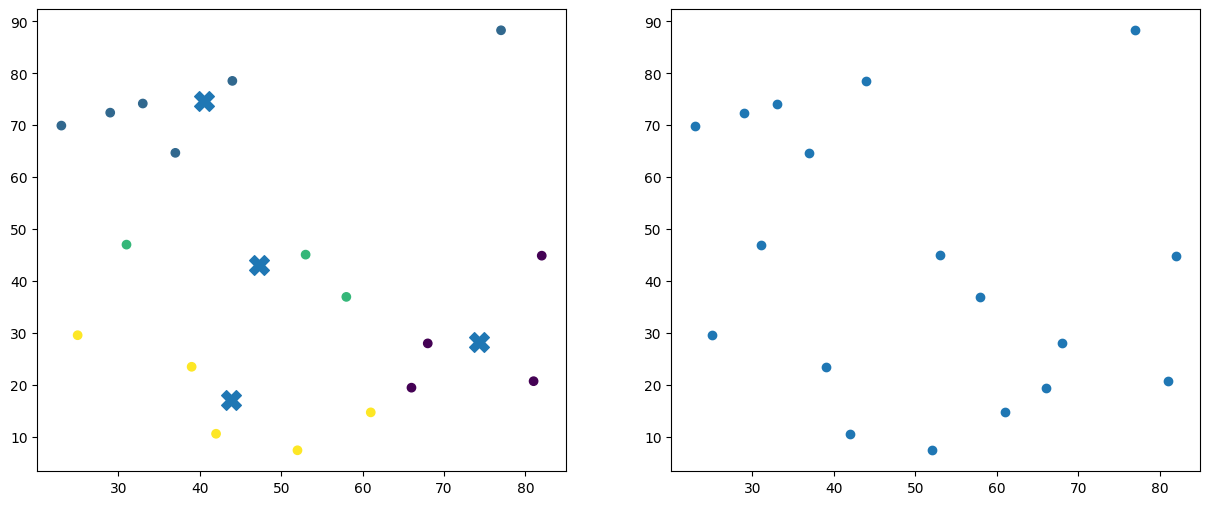

In [56]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42).fit(df)
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
ax[0].scatter(df['Idade'], df['Salário Mensal'], c=kmeans.labels_)
ax[0].scatter(centroids[:,0], centroids[:,1], marker="X", s=200)
ax[1].scatter(df['Idade'], df["Salário Mensal"])

In [60]:
y = kmeans.labels_
valores_k = []
ARI = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,n_init='auto').fit(df)
    valores_k.append(i)
    ARI.append(metrics.adjusted_rand_score(y,kmeans.labels_))

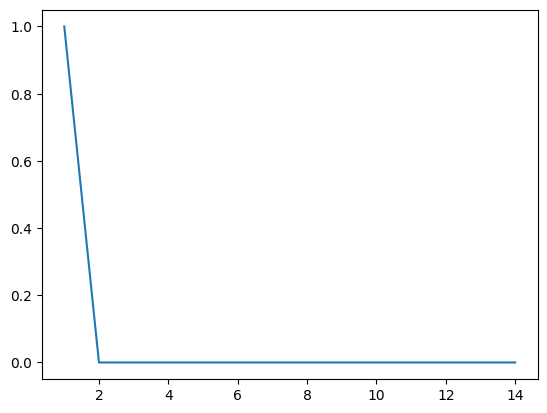

In [61]:
fig, ax = plt.subplots()
ax.plot(valores_k, ARI)

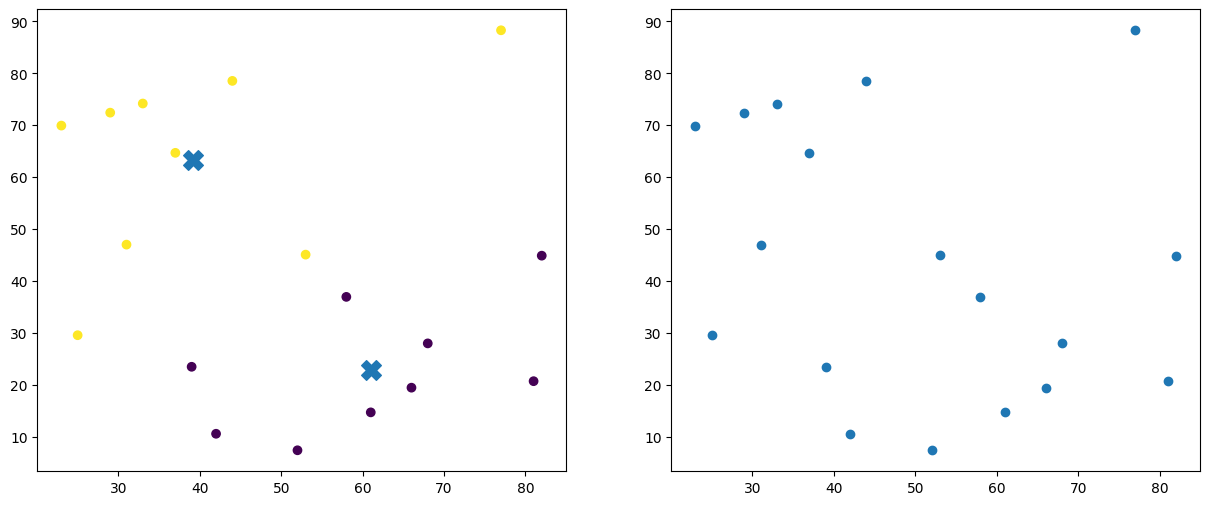

In [64]:
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42).fit(df)
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
ax[0].scatter(df['Idade'], df['Salário Mensal'], c=kmeans.labels_)
ax[0].scatter(centroids[:,0], centroids[:,1], marker="X", s=200)
ax[1].scatter(df['Idade'], df["Salário Mensal"])